# Исключения: обработка ошибок

## Исключения
Исключения (exceptions) – это события, возникающие во время выполнения программы, которые сигнализируют об ошибочной ситуации, но могут быть обработаны, чтобы программа продолжила выполнение.
### Примеры исключений  
* ZeroDivisionError – деление на ноль  
`print(10 / 0)`
* ValueError – ошибка значения  
`int("abc")`
* KeyError – обращение к несуществующему ключу словаря  )

In [34]:
info = {"a": 1}
print(info["b"])

KeyError: 'b'

### Зачем нужна обработка исключений?
* Улучшение стабильности программы: Позволяет программе продолжать работу после возникновения ошибки.
* Улучшение пользовательского опыта: Предоставляет понятные сообщения об ошибках вместо стандартных.
* Отладка: Помогает обнаруживать и исправлять ошибки в коде на ранних этапах разработки.


### Как Python реагирует на ошибки?
1. Когда в программе возникает ошибка:
   * Python создаёт объект исключения, который содержит:
   * Тип исключения (например, ValueError, TypeError)
   * Сообщение об ошибке, описывающее проблему
   * Трассировку (traceback), указывающую, где ошибка произошла
2. Если исключение не обработано, программа завершает выполнение, выводя трейсбэк (информацию об ошибке).


In [35]:
print(10 / 0)  # Ошибка: ZeroDivisionError

ZeroDivisionError: division by zero

### Иерархия исключений
В Python все исключения происходят от базового класса BaseException, однако для обработки ошибок используется иерархия, начинающаяся с Exception. Исключения ниже являются наиболее часто используемыми и наследуются от этого класса.
Для изучения всех встроенных исключений и их иерархии в Python можно обратиться к официальной документации:
* [Официальная документация Python: Исключения](https://docs.python.org/3/library/exceptions.html#exception-hierarchy)
 
***Основные ветви иерархии:***  
1. BaseException: Базовый класс для всех исключений.
2. Exception: Базовый класс для исключений, которые можно обработать. Основные подклассы:
   * ArithmeticError: базовый класс для арифметических ошибок.
      * ZeroDivisionError
      * OverflowError
   * LookupError: базовый класс для ошибок поиска.
      * IndexError
      * KeyError
   * OSError: базовый класс для ошибок ввода/вывода.
      * FileNotFoundError
      * PermissionError
   * ImportError и его подкласс ModuleNotFoundError.
   * RuntimeError, включая RecursionError.
   * TypeError, ValueError, AttributeError и другие.
     
Ветви SystemExit, KeyboardInterrupt и GeneratorExit наследуются от BaseException, но не обрабатываются как обычные исключения.


## Обработка исключений
Обработка исключений позволяет перехватывать ошибки, возникающие во время выполнения программы, чтобы предотвратить её аварийное завершение. Для этого используется конструкция try-except.
### Конструкция try-except
***try-except*** – это базовый механизм обработки исключений, который позволяет перехватывать ошибки во время выполнения программы и предотвращать её аварийное завершение.  
***Синтаксис:***   
```
try:
    # Код, который может вызвать исключение
except ExceptionType:
    # Код, который выполнится в случае исключения
```
`ExceptionType` – это тип исключения, который вы хотите обработать (например, ZeroDivisionError, ValueError и т.д.).


In [36]:
try:
    result = 10 / 0  # Возникает ZeroDivisionError
    # Следующий код не достижим при ошибке
    print("Деление выполнено успешно!")  
    print(result)
except ZeroDivisionError:
    print("Ошибка: деление на ноль!")


Ошибка: деление на ноль!


In [37]:
result = 10 / 0  # Возникает ZeroDivisionError
# Следующий код не достижим при ошибке
print("Деление выполнено успешно!")  
print(result)

ZeroDivisionError: division by zero

### Как Python выбирает обработчик исключений?
1. Python проверяет обработчики except сверху вниз.
   * Когда возникает исключение, Python идёт по списку обработчиков и выбирает первый подходящий.
2. Первый совпавший блок except выполняется, а остальные игнорируются.


In [44]:
user_input = input("Введите ненулевое число: ")
result = 10 / int(user_input)
print(f"Результат: {result}")

Введите ненулевое число:  hbgf


ValueError: invalid literal for int() with base 10: 'hbgf'

In [40]:
try:
    user_input = input("Введите ненулевое число: ")
    result = 10 / int(user_input) # Может возникнуть ZeroDivisionError, # Может возникнуть ValueError
    print(f"Результат: {result}")
except ValueError:
    print("Некорректное значение!")  # Пропускается, если ошибка не ValueError
except ZeroDivisionError:
    print("Ошибка деления на ноль!") # Этот блок выполнится, если ошибка ZeroDivisionError


Введите ненулевое число:  12


Результат: 0.8333333333333334


3. Если нет подходящего обработчика, программа завершает работу с ошибкой.


In [45]:
try:
    result = 10 / 0  # Возникает ZeroDivisionError
except IndexError:
    print("Индекс вне диапазона!")  # Пропускается
except KeyError:
    print("Ключ не существует!")  # Пропускается

ZeroDivisionError: division by zero

4. Общий обработчик Exception перехватывает все исключения, если они не были обработаны ранее.

In [46]:
try:
    result = 10 / 0  # Возникает ZeroDivisionError
except IndexError:
    print("Индекс вне диапазона!")  # Пропускается
except KeyError:
    print("Ключ не существует!")  # Пропускается
except Exception:
    print("Ошибка обработки!")  # Выполнится, так как `Exception` перехватывает `ZeroDivisionError`


Ошибка обработки!


5. Exception нужно ставить в конце.
* Если except Exception будет раньше, он перехватит все исключения, не дав сработать более специфичным обработчикам.


In [ ]:
try:
    result = 10 / 0
except Exception:  # Перехватывает всё, обработчики ниже не сработают
    print("Ошибка обработки!")  
except ZeroDivisionError:
    print("Ошибка деления на ноль!")  # Этот код недостижим


## Обработка нескольких исключений в одном блоке
Python позволяет обрабатывать несколько типов исключений в одном блоке except, используя кортеж из типов исключений.  
***Синтаксис:***  
```
try:
    # Код, который может вызвать исключение
except (ExceptionType1, ExceptionType2):
    # Код, который выполнится в случае любого из указанных исключений
```

In [3]:
while True:
    try:
        user_input = input("Введите ненулевое число: ")
        result = 10 / int(user_input)
        print(f"Результат: {result}")
        break  # Выход из цикла, если ошибок не было
    except (ZeroDivisionError, ValueError) as e:
        # Просим пользователя повторить ввод
        print(f"Ошибка! {e} Введите корректное ненулевое число.")


Введите ненулевое число:  er


Ошибка! invalid literal for int() with base 10: 'er' Введите корректное ненулевое число.


Введите ненулевое число:  0


Ошибка! division by zero Введите корректное ненулевое число.


Введите ненулевое число:  4


Результат: 2.5


### Сообщение об ошибке
Для уточнения причины исключения можно присвоить объект исключения переменной.


In [ ]:
try:
    # Попытка преобразования строки в число
    number = int("abc")
except (ZeroDivisionError, ValueError) as e:
    # Выводим текст исключения
    print(f"Произошла ошибка: {e}")

In [ ]:
#Какой результат будет выведен при выполнении следующего кода?
try:
    x = 1 / 0
except Exception:
    print("Общее исключение")
except ZeroDivisionError:
    print("Ошибка деления на ноль")


## Конструкция try-except-else
else в конструкции try-except используется для выполнения кода, который должен быть выполнен только если исключение не возникло в блоке try.  
***Синтаксис:***  

```
try:
    # Код, который может вызвать исключение
except ExceptionType:
    # Код, который выполнится при возникновении исключения
else:
    # Код, который выполнится, если исключение НЕ возникло
```

In [49]:
try:
    # Преобразование строки в число
    number = int(input("Введите число: "))
except ValueError:
    # Обработка некорректного ввода
    print("Ошибка! Введите корректное число.")
else:
    # Выполняется только если исключения не было
    print(f"Вы ввели число: {number}")

Введите число:  isjnb


Ошибка! Введите корректное число.


### Зачем использовать else?  
* Код в блоке else явно отделён от кода, который может вызвать исключение.
* Это улучшает читаемость программы.
* Позволяет избежать выполнения дополнительных операций в случае ошибки.
  
Включайте в блок try только необходимый код, который может вызвать исключение:
* Это улучшает читаемость.
* Упрощает отладку.
* Позволяет точнее обрабатывать исключения.


Пример: Использование else для разделения логики


In [51]:
try:
    # Проверка числа на чётность
    number = int(input("Введите число: "))
except ValueError:
    # Обработка некорректного ввода
    print("Ошибка! Введите корректное число.")
else:
    # Выполняется только если число успешно введено
    if number % 2 == 0:
        print(f"{number} – чётное число.")
    else:
        print(f"{number} – нечётное число.")


Введите число:  sfgb


Ошибка! Введите корректное число.


### Конструкция try-except-finally
***finally*** – это блок, который выполняется всегда, независимо от того, возникло ли исключение в блоке try.   
Он используется для завершения операций, которые должны быть выполнены в любом случае (например, закрытие соединений, файлов, освобождение памяти).
***Синтаксис:***   
```
try:
    # Код, который может вызвать исключение
except ExceptionType:
    # Код, который выполнится при возникновении исключения
finally:
    # Код, который выполнится всегда, независимо от исключений
```

In [54]:
try:
    # Преобразуем строку в число
    number = int(input("Введите число: "))
    result = 10 / number
except ValueError:
    # Обработка некорректного ввода
    print("Ошибка! Введите корректное число.")
except ZeroDivisionError:
    # Обработка деления на ноль
    print("Ошибка! Деление на ноль.")
finally:
    # Этот код выполнится в любом случае
    print("Завершение программы.")

Введите число:  0


Ошибка! Деление на ноль.
Завершение программы.


## Конструкция try-except-else-finally
Эта конструкция объединяет все блоки обработки исключений и завершения:
* try: Выполняется код, который может вызвать исключение.
* except: Выполняется, если в блоке try возникает исключение.
* else: Выполняется, если в блоке try не возникло исключений.
* finally: Выполняется в любом случае, независимо от того, было исключение или нет.


In [ ]:
try:
    # Попытка преобразовать строку в число и выполнить деление
    number = int(input("Введите число: "))
    result = 10 / number
except ValueError:
    # Обработка некорректного ввода
    print("Ошибка: введено некорректное значение.")
except ZeroDivisionError:
    # Обработка деления на ноль
    print("Ошибка: деление на ноль.")
else:
    # Выполняется только если исключений не было
    print(f"Результат деления: {result}")
finally:
    # Завершающие действия
    print("Программа завершена.")


## Ключевое слово raise
***raise*** используется для явного вызова исключений в Python. Это даёт возможность разработчику вручную вызвать исключение в любой части программы, чтобы указать на возникшую проблему.  
***Синтаксис:***  
`raise ExceptionType("Сообщение об ошибке")`
* ExceptionType – тип исключения, который вы хотите вызвать (например, ValueError, TypeError или пользовательское исключение).
* "Сообщение об ошибке" – пояснение причины исключения (опционально).


In [55]:
number = -1
if number < 0:
    raise ValueError("Число не может быть отрицательным")


ValueError: Число не может быть отрицательным

In [56]:
number = -1
if number < 0:
    raise ValueError()

ValueError: 

### Что делать дальше после raise?
Когда исключение вызывается с помощью raise, программа останавливает выполнение, если это исключение не перехвачено.
После использования raise:
1. Либо перехватите исключение с помощью try-except и обработайте его.
2. Либо позвольте программе завершиться, чтобы пользователь увидел информацию об ошибке.


In [58]:
while True:
    try:
        # Ввод числа пользователем
        number = int(input("Введите положительное число: "))
        if number < 0:
            raise ValueError("Число не может быть отрицательным")
        print(f"Вы ввели корректное число: {number}")
        break  # Завершаем цикл, если число корректное
    except ValueError as e:
        # Обработка некорректного ввода
        print(f"Ошибка: {e}. Попробуйте снова.")


Введите положительное число:  -2


Ошибка: Число не может быть отрицательным. Попробуйте снова.


Введите положительное число:  4


Вы ввели корректное число: 4


In [59]:
while True:
    try:
        # Ввод числа пользователем
        number = int(input("Введите положительное число: "))
        if number < 0:
            raise ValueError("Число не может быть отрицательным")
        print(f"Вы ввели корректное число: {number}")
        break  # Завершаем цикл, если число корректное
    except ValueError:
        # Обработка некорректного ввода
        print(f"Ошибка. Попробуйте снова.")

Введите положительное число:  dsf


Ошибка. Попробуйте снова.


Введите положительное число:  4


Вы ввели корректное число: 4


In [1]:
while True:
    try:
        # Ввод числа пользователем
        number = int(input("Введите положительное число: "))
        if number < 0:
            raise ValueError("Число не может быть отрицательным")
        print(f"Вы ввели корректное число: {number}")
        break  # Завершаем цикл, если число корректное
    except ValueError as q:
        # Обработка некорректного ввода
        print(f"Ошибка: {q}. Попробуйте снова.")

Введите положительное число:  -2


Ошибка: Число не может быть отрицательным. Попробуйте снова.


Введите положительное число:  3


Вы ввели корректное число: 3


In [2]:
q

NameError: name 'q' is not defined

In [ ]:
#Какой результат будет выведен при выполнении следующего кода?
try:
    print("До исключения", end=" | ")
    raise ValueError("Ошибка!")
    print("После исключения", end=" | ")
except ValueError as e:
    print(f"Перехвачено исключение: {e}")


# Логирование
Логирование — это процесс записи информации о работе программы, включая ошибки, предупреждения и отладочные сообщения. В Python для этого используется встроенный модуль logging, который позволяет выводить сообщения разного уровня важности в консоль или файлы.


### Основы логирования
Модуль поддерживает 5 уровней логирования (от менее серьёзных к более критичным):


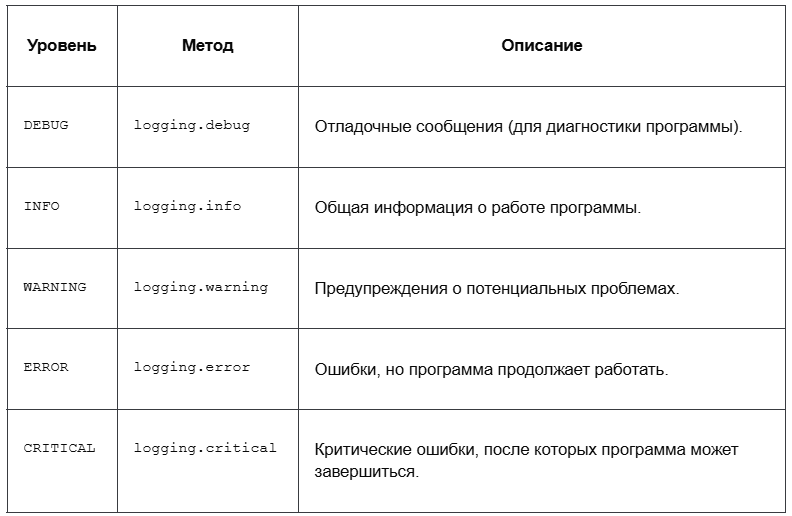

In [4]:
import logging


# Вывод различных сообщений
logging.debug("Отладочное сообщение")
logging.info("Информационное сообщение")
logging.warning("Предупреждение!")
logging.error("Ошибка!")
logging.critical("Критическая ошибка!")


ERROR:root:Ошибка!
CRITICAL:root:Критическая ошибка!


Почему DEBUG и INFO не отобразились?
* По умолчанию logging показывает только сообщения WARNING и выше.
* Чтобы увидеть DEBUG и INFO, нужно задать level=logging.DEBUG в basicConfig.

Однако в Jupyter Notebook (и Google Colab) после первоначальной настройки конфигурации лога повторные вызовы basicConfig() не произведут никакого эффекта. Можно изменять конфигурацию другими функциями, но мы для простоты будем просто удалять предыдущие конфигурации.


In [5]:
logging.root.removeHandler(logging.root.handlers[0]) # Удаление обработчика логов
# Настройка логирования (по умолчанию уровень WARNING и выше)
logging.basicConfig(level=logging.DEBUG)


# Вывод различных сообщений
logging.debug("Отладочное сообщение")
logging.info("Информационное сообщение")
logging.warning("Предупреждение!")
logging.error("Ошибка!")
logging.critical("Критическая ошибка!")

DEBUG:root:Отладочное сообщение
INFO:root:Информационное сообщение
ERROR:root:Ошибка!
CRITICAL:root:Критическая ошибка!


### Запись логов в файл
Можно настроить запись логов не только в консоль, но и в файл. 


In [6]:
logging.root.removeHandler(logging.root.handlers[0]) # Удаление обработчика логов


# Настройка логирования с записью в файл
logging.basicConfig(filename="app.log", level=logging.INFO)


logging.info("Программа запущена")
logging.warning("Низкий уровень памяти")
logging.error("Ошибка подключения к базе данных")


### Использование логов в обработке исключений
Логирование часто используется для записи ошибок.


In [ ]:
logging.root.removeHandler(logging.root.handlers[0]) # Удаление обработчика логов


logging.basicConfig(filename="app.log", level=logging.ERROR)


try:
    result = 10 / 0
except ZeroDivisionError as e:
    logging.error(f"Ошибка: {e}")


## Настройка формата логов
Модуль logging позволяет задавать собственный формат сообщений для логирования. Это делает логи более читаемыми и информативными.
Формат задаётся с помощью аргумента format="..." в logging.basicConfig().
Вот несколько ключевых плейсхолдеров, которые можно использовать:


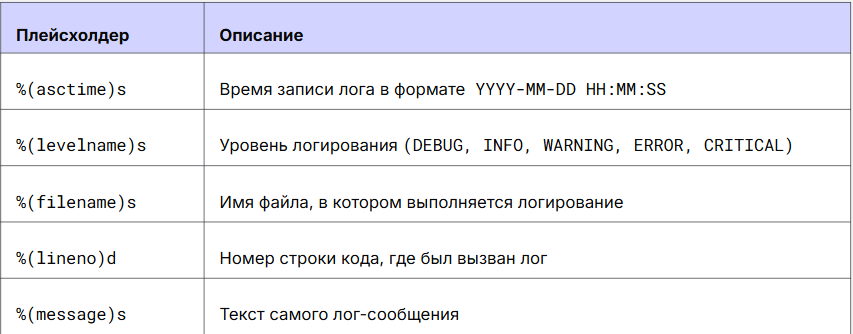

In [ ]:
logging.root.removeHandler(logging.root.handlers[0]) # Удаление обработчика логов


# Настройка формата логов
logging.basicConfig(
    filename="app.log",
    format="%(asctime)s - %(filename)s - %(lineno)d - %(levelname)s - %(message)s",
    level=logging.DEBUG
)


logging.debug("Это отладочное сообщение")
logging.info("Информационное сообщение")
logging.warning("Предупреждение")
logging.error("Ошибка")
logging.critical("Критическая ошибка")

### Лучшие практики обработки исключений
1. Обрабатывайте только ожидаемые исключения.
   * Указывайте конкретные типы исключений, чтобы не перехватывать ненужные ошибки.
2. Минимизируйте код в блоке try.
   * Включайте только тот код, который может вызвать исключение.
3. Используйте finally для освобождения ресурсов.
   * Например, для закрытия файлов или соединений.
4. Логируйте ошибки.
   * Вместо простого вывода используйте модуль logging для записи ошибок.


# Практические задания
1. ***Обработка ввода пользователя***  
Напишите программу, которая запрашивает у пользователя число и обрабатывает возможные ошибки ввода, пока не получат корректное число.  
Пример вывода:  
Введите число: qwe  
Ошибка: Введите корректное число.  
Введите число: 12.5  
Вы ввели число: 12.5  


In [ ]:
def get_valid_number():
    while True:
        try:
            return float(input("Введите число: "))
        except ValueError:
            print("Ошибка: Введите корректное число.")


num = get_valid_number()
print(f"Вы ввели число: {num}")

2. ***Проверка возраста***   
Напишите функцию, которая проверяет, что возраст пользователя не меньше 18 лет с использованием ошибок.  
Пример вывода:  
Введите возраст: 17  
Ошибка: Возраст должен быть 18 лет и старше.


In [ ]:
def check_age():
    age = int(input("Введите возраст: "))
    if age < 18:
        raise ValueError("Ошибка: Возраст должен быть 18 лет и старше.")
    print("Возраст принят.")


try:
    check_age()
except ValueError as e:
    print(e)


### Что почитать?
1. https://skillbox.ru/media/code/isklyucheniya-v-python-chto-eto-takoe-i-kak-s-nimi-rabotat/